<a href="https://colab.research.google.com/github/zackoflonely/028_SentimentAnalysis/blob/main/028_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/zackoflonely/028_SentimentAnalysis/main/Womens%20Clothing%20E-Commerce%20Reviews.csv")

In [3]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
import numpy as np
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [7]:
df["Review Text"] = df['Review Text'].replace(np.nan,'',regex=True)

sentiment_scores = []
for text in df["Review Text"]:
  scores = sid.polarity_scores(text)
  sentiment_scores.append(scores['compound'])

df["Sentiment Score"] = sentiment_scores

In [8]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Score
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291


In [9]:
def get_sentiment_label(score):
  if score >= 0.05:
    return 'Positive'
  elif score <= 0.05:
    return 'Negative'
  else:
    return 'Neutral'

sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

df['Sentiment Label'] = sentiment_labels

In [10]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Score,Sentiment Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,Positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,Positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,Positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,Positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.9419,Positive
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.8004,Positive
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,-0.0909,Negative
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,0.7175,Positive
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,-0.3724,Negative


In [11]:
df['Sentiment Label'].value_counts()

Positive    20987
Negative     2499
Name: Sentiment Label, dtype: int64

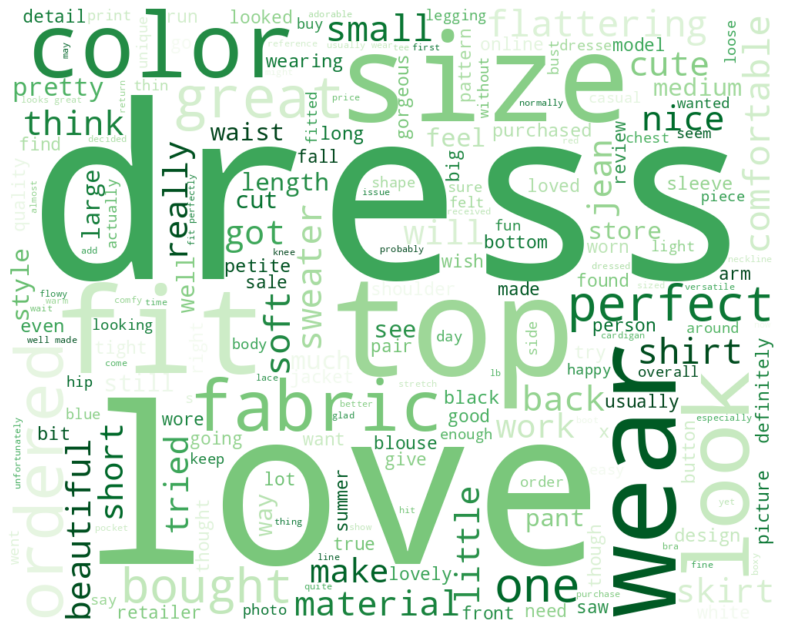

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_pos = df[df['Sentiment Label'] == 'Positive']

all_text = ' '.join(word for word in data_pos['Review Text'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

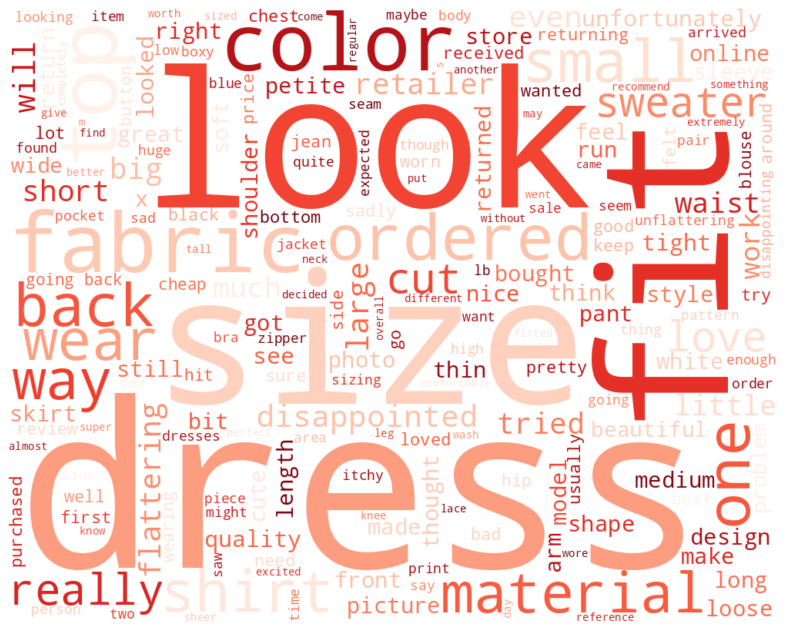

In [14]:
from wordcloud import WordCloud
data_pos = df[df['Sentiment Label'] == 'Negative']

all_text = ' '.join(word for word in data_pos['Review Text'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

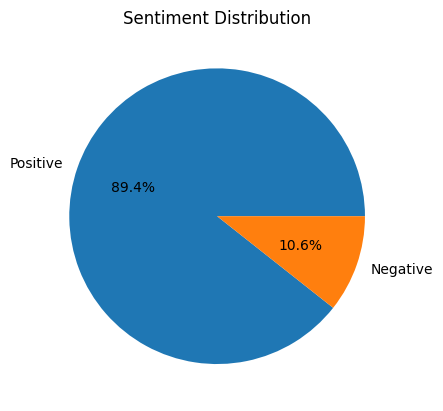

In [15]:
sentiment_counts = df['Sentiment Label'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct = '%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

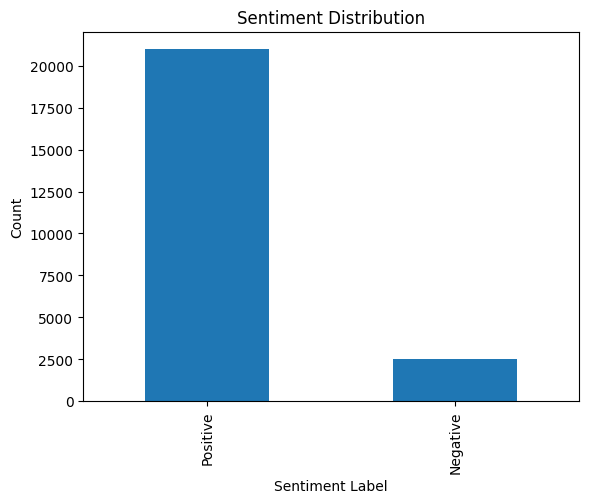

In [16]:
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

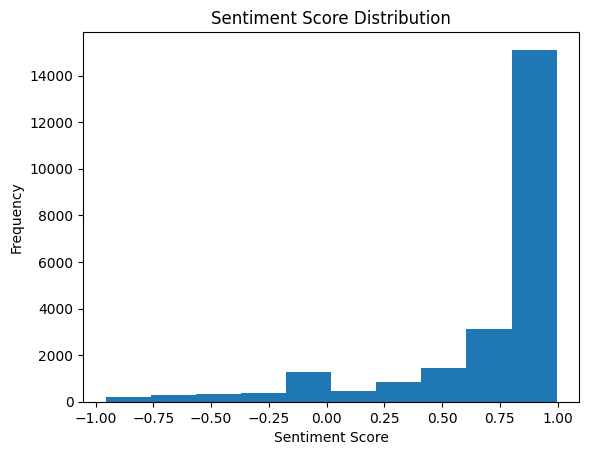

In [17]:
plt.hist(df['Sentiment Score'], bins=10)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()

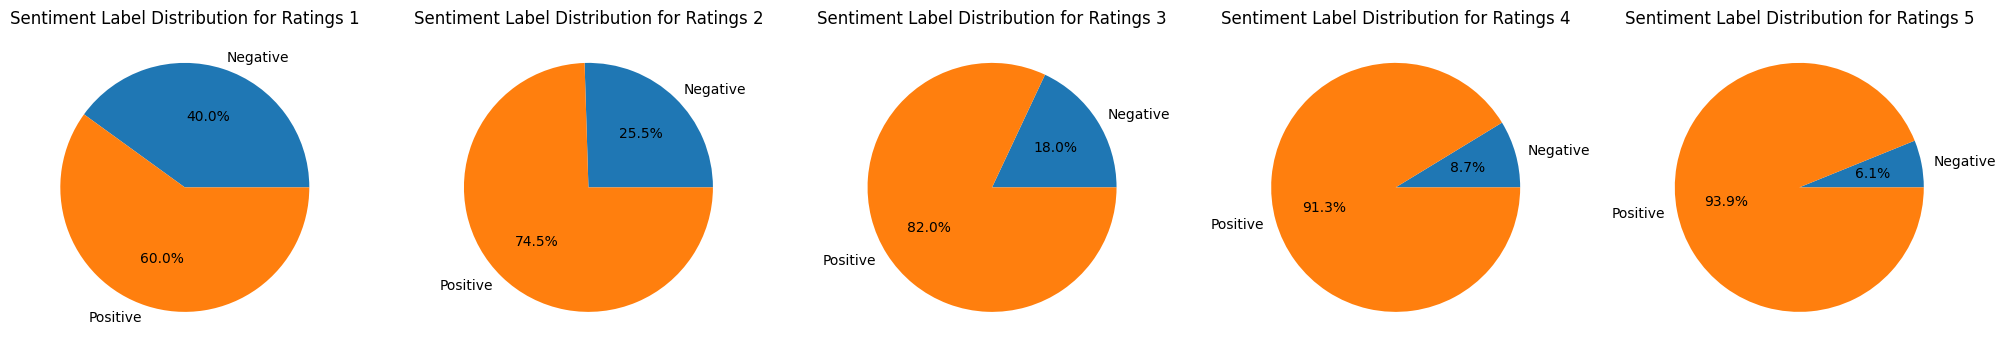

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # Mengatur jumlah subplot menjadi 1 baris dan 5 kolom
group = df.groupby(['Rating', 'Sentiment Label']).size().reset_index(name='Count')
for rating in range(1, 6):
    data = group[group['Rating'] == rating]
    ax = axs[rating-1]  # Mengakses subplot sesuai dengan rating
    ax.pie(data['Count'], labels=data['Sentiment Label'], autopct='%1.1f%%')
    ax.set_title(f'Sentiment Label Distribution for Ratings {rating}')

plt.tight_layout()  # Mengatur tata letak subplot agar tidak tumpang tindih
plt.show()


<Figure size 800x600 with 0 Axes>

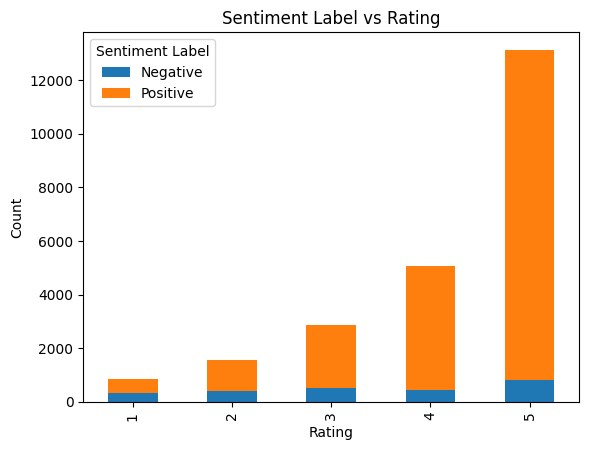

In [21]:
fig = plt.figure(figsize=(8,6))
df.groupby(['Rating', 'Sentiment Label']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Sentiment Label vs Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Naive Bayes Algorythm

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, roc_auc_score, recall_score

# Preprocessing data
df['Review Text'].fillna('', inplace=True)  # Mengisi nilai null pada kolom Review Text dengan string kosong

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment Label'], test_size=0.2, random_state=42)

# Ekstraksi fitur dengan metode TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Inisialisasi dan melatih model Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test_tfidf)

# Evaluasi model
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', nb_accuracy)
print('Precision:', nb_precision)
print('Recall:', nb_recall)
print('F1 Score:', nb_f1)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9018731375053214
Precision: 0.8133751561536924
Recall: 0.9018731375053214
F1 Score: 0.8553411267174139
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       461
    Positive       0.90      1.00      0.95      4237

    accuracy                           0.90      4698
   macro avg       0.45      0.50      0.47      4698
weighted avg       0.81      0.90      0.86      4698



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

## C4.5 Algorythm

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, roc_auc_score, recall_score

# Preprocessing data
df['Review Text'].fillna('', inplace=True)  # Mengisi nilai null pada kolom Review Text dengan string kosong

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment Label'], test_size=0.2, random_state=42)

# Ekstraksi fitur dengan metode TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Inisialisasi dan melatih model C4.5
c45 = DecisionTreeClassifier(criterion='entropy')
c45.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data uji
y_pred = c45.predict(X_test_tfidf)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.902085994040017
Precision: 0.9015189606773854
Recall: 0.902085994040017
F1 Score: 0.9017999543700971
Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.49      0.50       461
    Positive       0.95      0.95      0.95      4237

    accuracy                           0.90      4698
   macro avg       0.72      0.72      0.72      4698
weighted avg       0.90      0.90      0.90      4698



In [24]:
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, roc_auc_score

# Membuat DataFrame untuk menampilkan metrik evaluasi
data = {
    'Algorithm': ['Naive Bayes', 'C4.5'],
    'Accuracy': [nb_accuracy, accuracy],
    'Precision': [nb_precision, precision],
    'RaUC': [nb_recall, recall],
    'F1 Score': [nb_f1, f1]
}

df1 = pd.DataFrame(data)

# Menampilkan tabel
print(tabulate(df1, headers='keys', tablefmt='psql'))


+----+-------------+------------+-------------+----------+------------+
|    | Algorithm   |   Accuracy |   Precision |     RaUC |   F1 Score |
|----+-------------+------------+-------------+----------+------------|
|  0 | Naive Bayes |   0.901873 |    0.813375 | 0.901873 |   0.855341 |
|  1 | C4.5        |   0.902086 |    0.901519 | 0.902086 |   0.9018   |
+----+-------------+------------+-------------+----------+------------+
